## Look at the value of slope criticality on canyon walls and axis

In [121]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
from netCDF4 import Dataset
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import scipy.stats
import warnings
warnings.filterwarnings("ignore")
import xarray as xr

import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

sns.set_context('paper')
sns.set_style('white')

In [122]:
CanyonGridBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
CanyonGridBarOut = Dataset(CanyonGridBar)

CanyonStateBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
CanyonStateBarOut = Dataset(CanyonStateBar)


CanyonGrid='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonState='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

CanyonGridLon2='/data/kramosmu/results/TracerExperiments/LONGER_CNY2/run01/gridGlob.nc'
CanyonGridLon2Out = Dataset(CanyonGridLon2)

CanyonStateLon2='/data/kramosmu/results/TracerExperiments/LONGER_CNY2/run01/stateGlob.nc'
CanyonStateLon2Out = Dataset(CanyonStateLon2)

In [123]:
# Grid variables
nx = 616
ny = 360
nz = 90
nt = 19 # t dimension size 
time = CanyonStateOut.variables['T']

sb_ind = 29

In [124]:
# 2x canyon
depth = -CanyonGridOut.variables['Depth'][:]
Y = CanyonGridOut.variables['Y'][:]
X = CanyonGridOut.variables['X'][:]
RC = CanyonGridOut.variables['RC'][:]
hFacC = CanyonGridOut.variables['HFacC'][:]

In [125]:
# 1.5x canyon
depthLon2 = -CanyonGridLon2Out.variables['Depth'][:]
YLon2 = CanyonGridLon2Out.variables['Y'][:]
XLon2 = CanyonGridLon2Out.variables['X'][:]
RCLon2 = CanyonGridLon2Out.variables['RC'][:]
hFacCLon2 = CanyonGridLon2Out.variables['HFacC'][:]

In [126]:
# Barkley-like
depthBar = -CanyonGridBarOut.variables['Depth'][:]
YBar = CanyonGridBarOut.variables['Y'][:]
XBar = CanyonGridBarOut.variables['X'][:]
RCBar = CanyonGridBarOut.variables['RC'][:]
hFacCBar = CanyonGridBarOut.variables['HFacC'][:]

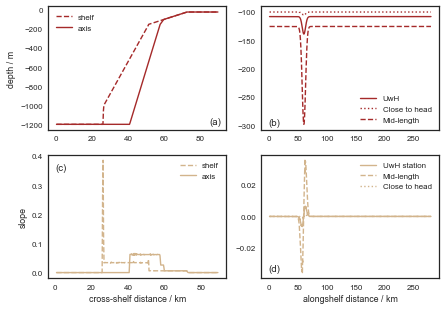

In [196]:
fig, ((ax, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(7,5))

# plot canyon axis and shelf
ax.plot(YBar/1000,depthBar[:,400], color='brown', linestyle='--', label='shelf')
ax.plot(YBar/1000,depthBar[:,180], color='brown', label='axis')

ax2.plot(XBar/1000,depthBar[261,:], color='brown', linestyle='-', label='UwH')
ax2.plot(XBar/1000,depthBar[267,:], color='brown', linestyle=':', label='Close to head')
ax2.plot(XBar/1000,depthBar[247,:], color='brown', linestyle='--', label='Mid-length')

ax.set_ylabel('depth / m')

ax2.legend(loc=0)
ax.legend(loc=0)

#--- Slopes --------------------------------------------------------------------------------------------------
shelf_slope = (depthBar[2:,400]-depthBar[:-2,400])/(YBar[2:]-YBar[:-2])
axis_slope = (depthBar[2:,180]-depthBar[:-2,180])/(YBar[2:]-YBar[:-2])

alongshelf_slope = (depthBar[261,2:]-depthBar[261,:-2])/(XBar[2:]-XBar[:-2]) # at y index station UwH
mouth_slope = (depthBar[247,2:]-depthBar[247,:-2])/(XBar[2:]-XBar[:-2]) # at y index 247
head_slope = (depthBar[267,2:]-depthBar[267,:-2])/(XBar[2:]-XBar[:-2]) # at y index 267

# plot canyon axis and shelf
ax3.plot(YBar[1:-1]/1000, shelf_slope, color='tan', linestyle='--', label='shelf')
ax3.plot(YBar[1:-1]/1000, axis_slope, color='tan', label='axis')

ax4.plot(XBar[1:-1]/1000, alongshelf_slope, color='tan', linestyle='-', label='UwH station')
ax4.plot(XBar[1:-1]/1000, mouth_slope, color='tan', linestyle='--', label='Mid-length')
ax4.plot(XBar[1:-1]/1000, head_slope, color='tan', linestyle=':', label='Close to head')

ax3.set_ylabel('slope')

ax3.set_xlabel('cross-shelf distance / km')
ax4.set_xlabel('alongshelf distance / km')

ax3.legend(loc=0)
ax4.legend(loc=0)

ax.text(85,-1200,'(a)')
ax2.text(-1,-300,'(b)')
ax3.text(0,0.35,'(c)')
ax4.text(-1,-0.035,'(d)')
plt.savefig('topo_slope.eps', format='eps')

### Criticality

$\alpha = \frac{\partial H/ \partial x}{[(\omega^2-f^2)/(N^2-\omega^2)]^{1/2}}$

Using $f=9.66\times10^{-5}$ s$^{-1}$ 

Period of $M_2$ = 12.42 hrs

$\omega_{M_2} = 2\pi(12.42h \times 3600s/h)^{-1} = 1.4\times10^{-4}$ s$^{-1}$

In [128]:
om2 = (1.4E-4)**2
f2 = (9.66E-5)**2
N2 = (5.5E-3)**2

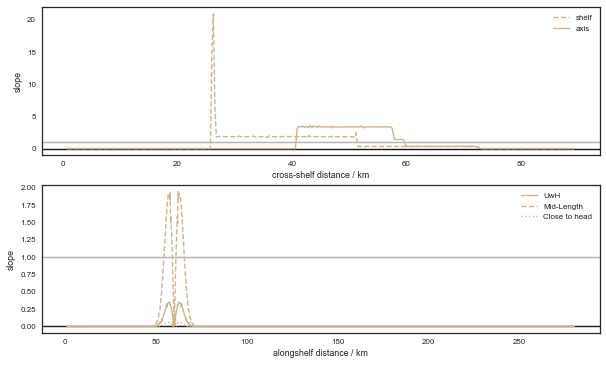

In [129]:
fig, ((ax, ax2)) = plt.subplots(2,1, figsize=(10,6))

ax.axhline(y=1, color='0.7')
ax2.axhline(y=1, color='0.7')
ax.axhline(y=0, color='0.1')
ax2.axhline(0, color='0.1')


alpha_shelf = np.abs(shelf_slope)/(((om2-f2)/(N2-om2))**0.5)
alpha_axis = np.abs(axis_slope)/(((om2-f2)/(N2-om2))**0.5)
alpha_alongshelf = np.abs(alongshelf_slope)/(((om2-f2)/(N2-om2))**0.5)
alpha_head = np.abs(head_slope)/(((om2-f2)/(N2-om2))**0.5)
alpha_mouth = np.abs(mouth_slope)/(((om2-f2)/(N2-om2))**0.5)

ax.plot(YBar[1:-1]/1000, alpha_shelf, color='tan', linestyle='--', label='shelf')
ax.plot(YBar[1:-1]/1000, alpha_axis, color='tan', label='axis')

ax2.plot(XBar[1:-1]/1000, alpha_alongshelf, color='tan', linestyle='-', label='UwH')
ax2.plot(XBar[1:-1]/1000, alpha_mouth, color='tan', linestyle='--', label='Mid-Length')
ax2.plot(XBar[1:-1]/1000, alpha_head, color='tan', linestyle=':', label='Close to head')

ax.set_ylabel('slope')
ax2.set_ylabel('slope')

ax.set_xlabel('cross-shelf distance / km')
ax2.set_xlabel('alongshelf distance / km')

ax.legend(loc=0)
ax2.legend(loc=0)


0.191821305817 0.3
0.769683899905 0.3
0.35048139637  
1.40630826619  
0.783903446847 5
3.14541630059 5
0.960102464305 7.5
3.85241569431 7.5


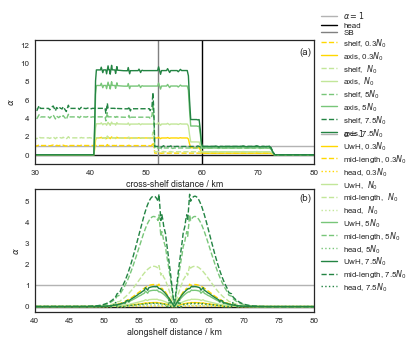

In [199]:
om2 = (1.4E-4)**2
f2 = (9.66E-5)**2

fig, ((ax, ax2)) = plt.subplots(2,1, figsize=(5,5))

ax.axhline(y=1, color='0.7', label=r'$\alpha=1$')
ax2.axhline(y=1, color='0.7', label=r'$\alpha=1$')
ax.axhline(y=0, color='0.1')
ax2.axhline(0, color='0.1')

ax.axvline(60, color='0.0', label='head')
ax.axvline(52, color='0.5', label='SB')

No2 = (5.5E-3)**2
colors = ['gold','#c2e699','#78c679','#238443']
labels = ['0.3',' ','5','7.5']

for N2, col, lab in zip([0.3*No2,No2, 5*No2, 7.5*No2], colors, labels):
    
    alpha_shelf = np.abs(shelf_slope)/(((om2-f2)/(N2-om2))**0.5)
    alpha_axis = np.abs(axis_slope)/(((om2-f2)/(N2-om2))**0.5)
    
    alpha_alongshelf = np.abs(alongshelf_slope)/(((om2-f2)/(N2-om2))**0.5)
    alpha_head = np.abs(head_slope)/(((om2-f2)/(N2-om2))**0.5)
    alpha_mouth = np.abs(mouth_slope)/(((om2-f2)/(N2-om2))**0.5)

    ax.plot(YBar[1:-1]/1000, alpha_shelf, color=col, linestyle='--', label='shelf, %s$N_0$' %lab)
    ax.plot(YBar[1:-1]/1000, alpha_axis, color=col, label='axis, %s$N_0$' %lab)

    ax2.plot(XBar[1:-1]/1000, alpha_alongshelf, color=col, linestyle='-', label='UwH, %s$N_0$' %lab)
    ax2.plot(XBar[1:-1]/1000, alpha_mouth, color=col, linestyle='--', label='mid-length, %s$N_0$' %lab)
    ax2.plot(XBar[1:-1]/1000, alpha_head, color=col, linestyle=':', label='head, %s$N_0$' %lab)
    
    print(np.max(alpha_alongshelf), lab)
    print(np.max(alpha_axis[261:]), lab)

ax.set_ylabel(r'$\alpha$')
ax2.set_ylabel(r'$\alpha$')
ax.set_xlabel('cross-shelf distance / km')
ax2.set_xlabel('alongshelf distance / km')

ax.legend(bbox_to_anchor=(1,0.15), ncol=1,labelspacing=0.1)
ax2.legend(bbox_to_anchor=(1.,0.1), ncol=1, labelspacing=0.1)


ax2.set_xlim(40,80)
ax.set_xlim(30,80)
ax.set_ylim(-1, 12.5)

ax.text(77.5,11,'(a)')
ax2.text(78,5,'(b)')
plt.savefig('criticality.eps', format='eps', bbox_inches='tight')

### Smaller f

(-1, 12.5)

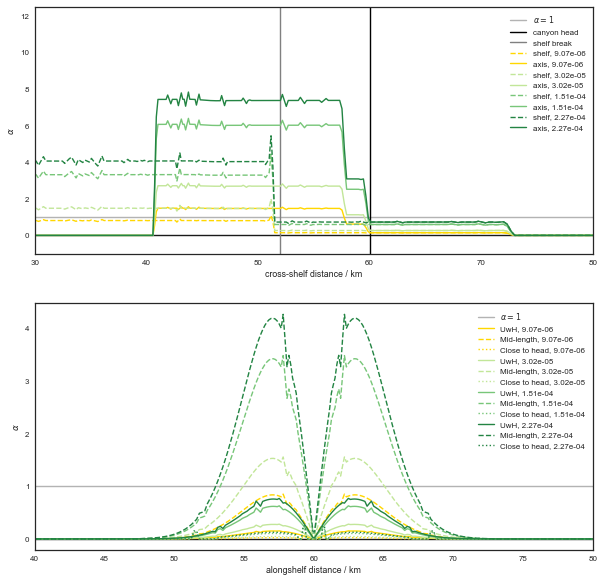

In [131]:
om2 = (1.4E-4)**2
f2 = (6E-5)**2

fig, ((ax, ax2)) = plt.subplots(2,1, figsize=(10,10))

ax.axhline(y=1, color='0.7', label=r'$\alpha=1$')
ax2.axhline(y=1, color='0.7', label=r'$\alpha=1$')
ax.axhline(y=0, color='0.1')
ax2.axhline(0, color='0.1')

ax.axvline(60, color='0.0', label='canyon head')
ax.axvline(52, color='0.5', label='shelf break')

No2 = (5.5E-3)**2
colors = ['gold','#c2e699','#78c679','#238443']

for N2, col in zip([0.3*No2,No2, 5*No2, 7.5*No2], colors):
    
    alpha_shelf = np.abs(shelf_slope)/(((om2-f2)/(N2-om2))**0.5)
    alpha_axis = np.abs(axis_slope)/(((om2-f2)/(N2-om2))**0.5)
    alpha_alongshelf = np.abs(alongshelf_slope)/(((om2-f2)/(N2-om2))**0.5)
    alpha_head = np.abs(head_slope)/(((om2-f2)/(N2-om2))**0.5)
    alpha_mouth = np.abs(mouth_slope)/(((om2-f2)/(N2-om2))**0.5)

    ax.plot(YBar[1:-1]/1000, alpha_shelf, color=col, linestyle='--', label='shelf, %1.2e' %N2)
    ax.plot(YBar[1:-1]/1000, alpha_axis, color=col, label='axis, %1.2e' %N2)

    ax2.plot(XBar[1:-1]/1000, alpha_alongshelf, color=col, linestyle='-', label='UwH, %1.2e' %N2)
    ax2.plot(XBar[1:-1]/1000, alpha_mouth, color=col, linestyle='--', label='Mid-length, %1.2e' %N2)
    ax2.plot(XBar[1:-1]/1000, alpha_head, color=col, linestyle=':', label='Close to head, %1.2e' %N2)


ax.set_ylabel(r'$\alpha$')
ax2.set_ylabel(r'$\alpha$')
ax.set_xlabel('cross-shelf distance / km')
ax2.set_xlabel('alongshelf distance / km')

ax.legend(loc=0)
ax2.legend(loc=0)


ax2.set_xlim(40,80)
ax.set_xlim(30,80)
ax.set_ylim(-1, 12.5)